In [5]:
# Import van libaries

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as layers
from PIL import Image
import random

In [7]:
# Use is the real unlabeled data
# Use 1 contains random chosen 80 unlabeled apples
# Use 2 contains 77 healty apples and three other

#apple_dir = 'Use'
apple_dir = 'Use1'
#apple_dir = 'Use2'


apple_ds = tf.keras.utils.image_dataset_from_directory(
    apple_dir, image_size=(224, 224), labels = None)

class_names = train_ds.class_names
num_classes = len(class_names)

Found 382 files belonging to 4 classes.
Using 306 files for training.
Found 382 files belonging to 4 classes.
Using 76 files for validation.
Found 80 files belonging to 1 classes.


In [8]:
# Save the model.
#modelX.load('mobilenetv2')

modelX = tf.keras.models.load_model('janmodel')

In [9]:
#show the predictions of the batch.

batchPredictions = modelX.predict(apple_ds)

predicted_categories = tf.argmax(batchPredictions, axis=1)
print(predicted_categories)

tf.Tensor(
[2 2 2 2 2 2 2 2 2 2 1 2 3 3 2 2 2 1 2 2 2 2 2 2 2 2 2 3 2 2 2 1 3 1 2 2 1
 2 2 2 2 2 1 2 1 2 3 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2
 2 3 2 2 2 2], shape=(80,), dtype=int64)


In [10]:
# Make a list from the outcome and print them.

predicted_categories[0]
predicted_categories[0].numpy().tolist()
samplebatchnp = predicted_categories.numpy()
samplebatchlist = samplebatchnp.tolist()
print(samplebatchlist)
print(samplebatchlist.count(0))
print(samplebatchlist.count(1))
print(samplebatchlist.count(2))
print(samplebatchlist.count(3))

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 3, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 3, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2]
0
12
62
6


In [17]:
# Eventualy made for choosing random 80 Apples from the databatch. 
# Later we made a batch of 80 apples so it won't do anything when the batch consists 80 images.

# aqlset_list =(random.choices(samplebatchlist,k = 80))
# print(aqlset_list)

In [11]:
# AQL tester.

blotchApple = samplebatchlist.count(0)
HealtyApple = samplebatchlist.count(1)
rotApple = samplebatchlist.count(2)
scabApple = samplebatchlist.count(3)

def AQLTestscore():

    for apple in samplebatchlist:
        
        if HealtyApple >=79:
            print (f'The batch has been quallified as: Class 1\n')
        elif HealtyApple >=75:
            print (f'The batch has been quallified as: Class 2\n')
        elif HealtyApple >=73:
            print (f'The batch has been quallified as: Class 3\n')
        else:
            print (f'The batch has been rejected\n')

        print (f'The total batch of {len(samplebatchlist)} apples consists of:\n'
        f'Healthy apples: {HealtyApple}\n'
        f'Blotch apples: {blotchApple}\n'
        f'Rot apples: {rotApple}\n'
        f'Scab apples: {scabApple}\n')
        break
    
AQLTestscore()

The batch has been rejected

The total batch of 80 apples consists of:
Healthy apples: 12
Blotch apples: 0
Rot apples: 62
Scab apples: 6



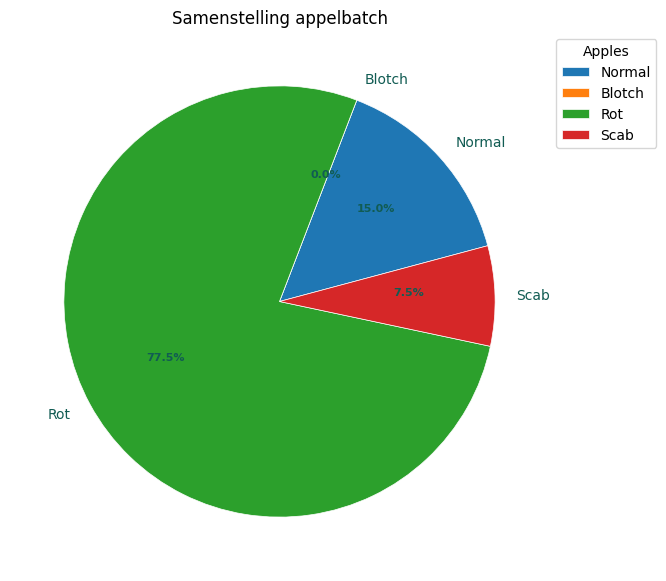

In [12]:
# Show the values in a wedge Diagram.
appleLabels = ['Normal', 'Blotch', 'Rot', 'Scab']
 
data = [HealtyApple, blotchApple, rotApple, scabApple]

# Creating explode data
explode = (0.0, 0.0, 0.0, 0.0) # not necessary

# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "white" }

# Creating autocpt arguments
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%\n".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
								autopct = lambda pct: func(pct, data),
								explode = explode,
								labels = appleLabels,
								shadow = False,
								startangle = 15,
								wedgeprops = wp,
								textprops = dict(color ="#115C53"))

# Adding legend
ax.legend(wedges, appleLabels,
		title ="Apples",
		loc ="upper left",
		bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Samenstelling appelbatch") # add Classification as title

#show plot
plt.show() 

In [13]:
# SentenceTransformers is a Python framework for state-of-the-art sentence, text and image embeddings.
# Choosen model
# all-MiniLM-L12-v2 	68.70 Performance sentence.
#                   	50.82	Performance semantic.
#                     59.76	Average performance.
#                     7500	Speed.
#                     120 MB Modelsize.


from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L12-v2')


accuracyBatch = modelX.evaluate(apple_ds)

sentences = [f'There are {HealtyApple} healthy apples in this batch',
                                  f'The accuracy of this prediction is {accuracyBatch} for loss and accuracyS',
                                  f'This batch contains {rotApple} rotten apple(s)',
                                  f'This batch contains {scabApple} scabbed apple(s)',
                                  f'This batch contains {blotchApple} blotched apple(s)',
                                    'Class 1 are 79 healty apples for example supermarkets ore greengrocer',
                                    'Class 2 are 75 healty apples used for exapmle in applesause',
                                    'Class 3 are 73 healty apples used for syrup',
                                    'A rejected batch can be used for petfood',
                                    'We have 4 types of apples, Blotch, Normal, Rot and Scab',
                                    'A batch consists of 80 apples',
                                    'Am I so smart ore are you so dum',
                                    'AQL means Acceptance Quality limit',
                                    'The lot size is between 5.000 and 10.000 apples']


query_embedding = model.encode(input('what is your question?'), convert_to_tensor=True)
passage_embedding = model.encode(sentences, convert_to_tensor=True)
answerArray = util.dot_score(query_embedding, passage_embedding)

print("Similarity:", answerArray)

answerLocation = answerArray.argmax()

print(sentences[answerLocation.item()])

3/3 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Similarity: tensor([[0.7174, 0.1231, 0.6734, 0.6813, 0.7700, 0.5353, 0.5352, 0.5030, 0.2739,
         0.6477, 0.7088, 0.1454, 0.1227, 0.5840]])
This batch contains 0 blotched apple(s)
